In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.30000,2,0.00000,106.14000,35.46000,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.36600,3,0.10000,36.03600,9.72000,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.12000,4,0.00000,29.64000,8.17000,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86500,3,0.50000,-26.05500,4.82000,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67000,5,0.10000,37.77000,4.70000,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90400,2,0.20000,4.51880,0.89000,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99000,1,0.00000,0.42000,0.49000,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40000,3,0.00000,12.36000,0.35000,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12000,1,0.00000,0.56000,0.19900,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.02400,3,0.20000,-0.60480,0.17000,Medium,2014


In [5]:
df.shape

(51290, 21)

In [6]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.00000,51290.00000,51290.00000,51290.00000,51290.00000,51290.00000
mean,246.00000,3.00000,0.00000,29.00000,26.00000,2013.00000
std,488.00000,2.00000,0.00000,174.00000,57.00000,1.00000
min,0.00000,1.00000,0.00000,-6600.00000,0.00000,2011.00000
25%,31.00000,2.00000,0.00000,0.00000,3.00000,2012.00000
50%,85.00000,3.00000,0.00000,9.00000,8.00000,2013.00000
75%,251.00000,5.00000,0.00000,37.00000,24.00000,2014.00000
max,22638.00000,14.00000,1.00000,8400.00000,934.00000,2014.00000


In [10]:
df[['order_date']].head()

,order_date
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01


In [11]:
df['month_year'] = df['order_date'].apply (lambda x: x.strftime('%Y:%m'))

In [12]:
df_temp = df.groupby(['month_year']).sum()['sales'].reset_index()

In [13]:
df_temp.head()

,month_year,sales
0,2011:01,98898.48886
1,2011:02,91152.15698
2,2011:03,145729.36736
3,2011:04,116915.76418
4,2011:05,146747.83610


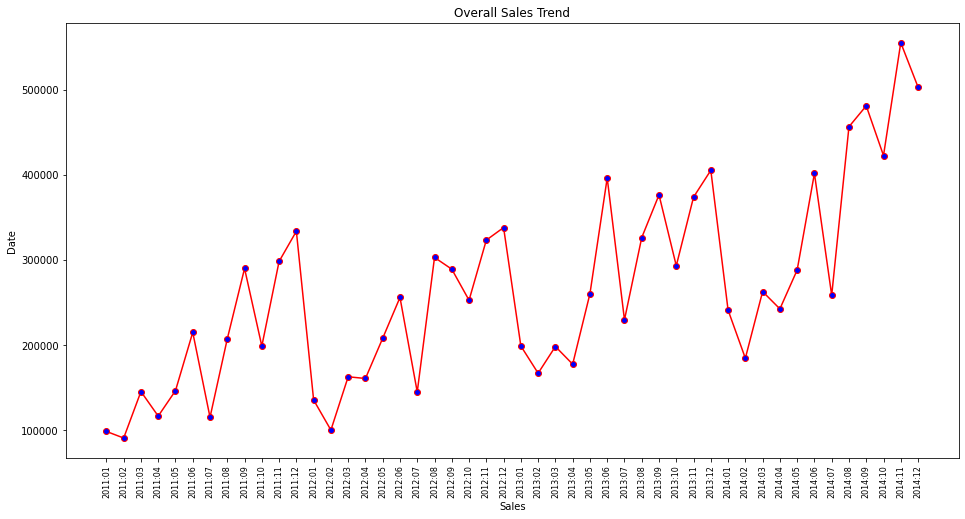

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df_temp['month_year'], df_temp['sales'], color='red', linestyle='-',marker='o',markerfacecolor='blue')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Sales')
plt.ylabel('Date')
plt.title('Overall Sales Trend')
plt.show()


In [15]:
top_10_prod_sales = pd.DataFrame(df.groupby(['product_name']).sum()['sales'])

In [16]:
top_10_prod_sales.sort_values(by='sales',inplace=True,ascending=False)

In [17]:
top_10_prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.77860
"Cisco Smart Phone, Full Size",76441.53060
"Motorola Smart Phone, Full Size",73156.30300
"Nokia Smart Phone, Full Size",71904.55550
Canon imageCLASS 2200 Advanced Copier,61599.82400
"Hon Executive Leather Armchair, Adjustable",58193.48410
"Office Star Executive Leather Armchair, Adjustable",50661.68400
"Harbour Creations Executive Leather Armchair, Adjustable",50121.51600
"Samsung Smart Phone, Cordless",48653.46000


In [18]:
top_10_prod_quantity = pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])

In [19]:
top_10_prod_quantity.sort_values(by='quantity',inplace=True, ascending=False)

In [20]:
top_10_prod_quantity[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [21]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

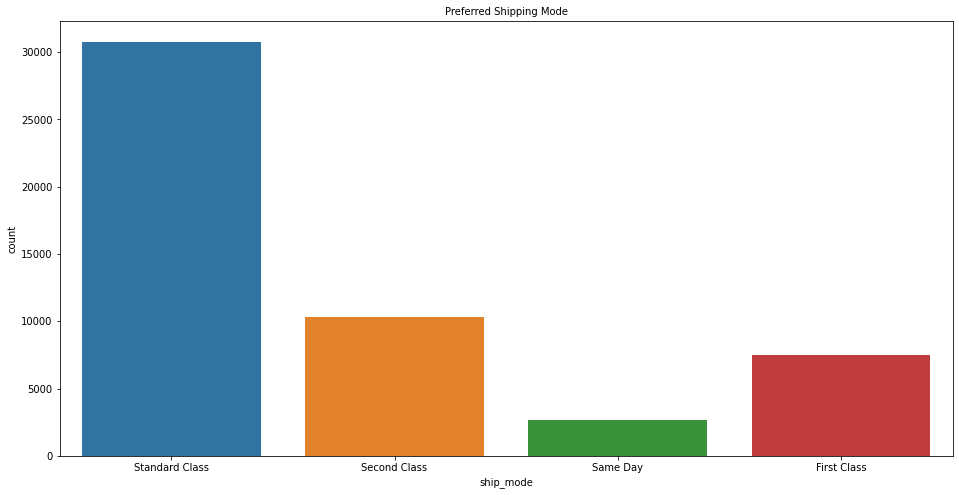

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(x='ship_mode',data=df)
plt.title('Preferred Shipping Mode', size =10)
plt.show()

In [23]:
cat_subcat = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [24]:
cat_subcat.sort_values(by=['category','profit'], inplace=True, ascending=False)

In [25]:
cat_subcat

profit
category        sub_category             
Technology      Copiers      258567.54818
                Phones       216717.00580
                Accessories  129626.30620
                Machines      58867.87300
Office Supplies Appliances   141680.58940
                Storage      108461.48980
                Binders       72449.84600
                Paper         59207.68270
                Art           57953.91090
                Envelopes     29601.11630
                Supplies      22583.26310
                Labels        15010.51200
                Fasteners     11525.42410
Furniture       Bookcases    161924.41950
                Chairs       141973.79750
                Furnishings   46967.42550
                Tables       -64083.38870

<AxesSubplot:xlabel='sales', ylabel='profit'>

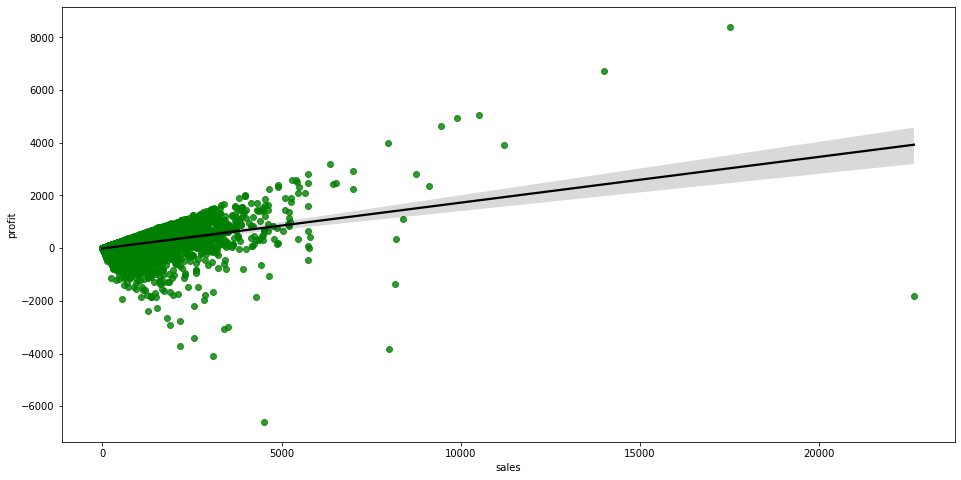

In [26]:
plt.figure(figsize=(16,8))
sns.regplot(x='sales',y='profit',data = df, scatter_kws={'color':'green'}, line_kws={'color':'black'})

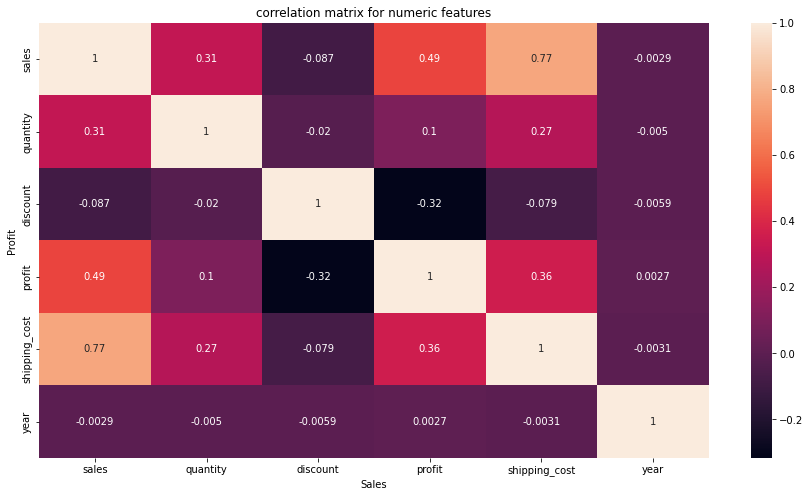

In [27]:
plt.figure(figsize=(15,8))
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [28]:
#sns.pairplot(df, plot_kws={'color':'red'})

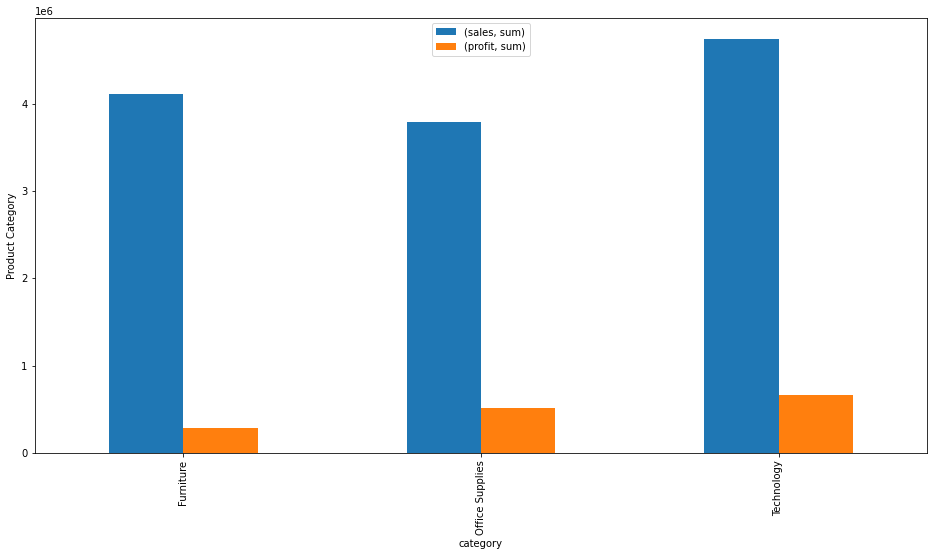

In [29]:
#category wise sales and profit
plt.rcParams['figure.figsize']=(16,8)
df.groupby('category')['sales','profit'].agg(['sum']).plot.bar()
plt.ylabel('Product Category')
plt.legend(loc = 'upper center')
plt.show()


<AxesSubplot:ylabel='sub_category'>

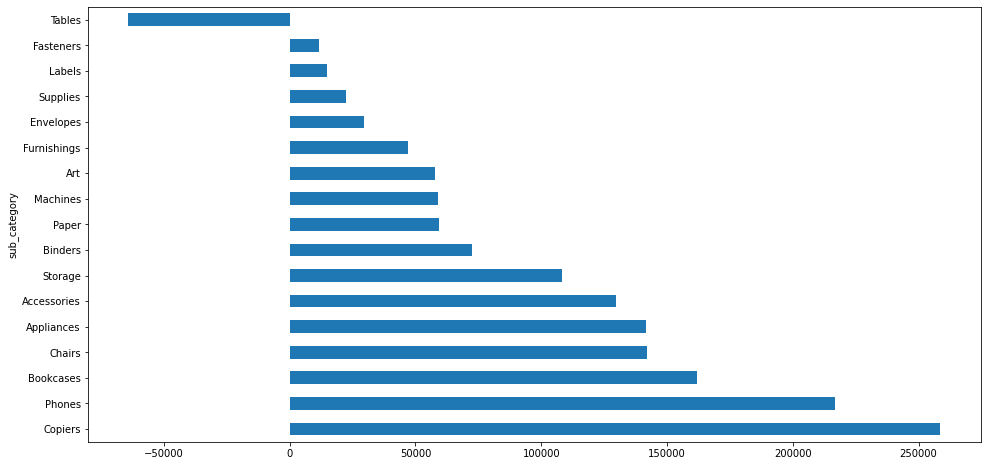

In [30]:
#further divide the category into sub category and then analyze
plt.figure(figsize=(16,8))
subcat_profit = df.groupby(['sub_category'])['profit'].sum().nlargest(n=20)
subcat_profit.plot.barh()

In [31]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [32]:
df['region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [33]:
df.region.value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

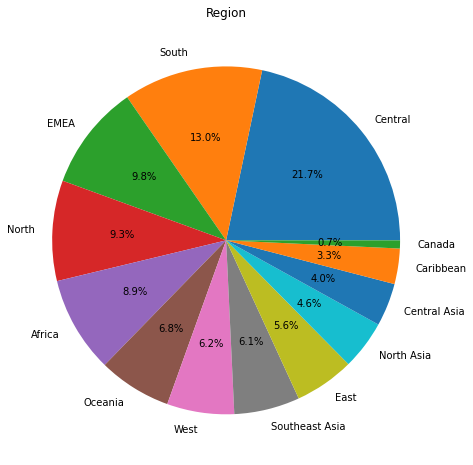

In [34]:
#no of customers- region wise
plt.figure(figsize=(8,8))
plt.title('Region')
plt.pie(df['region'].value_counts(),labels=df['region'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [35]:
#region wise profit distribution

reg_profit_dist = df.groupby(['region'])['profit'].agg(['sum'])

In [36]:
reg_profit_dist

,sum
region,
Africa,88871.63100
Canada,17817.39000
Caribbean,34571.32104
Central,311403.98164
Central Asia,132480.18700
EMEA,43897.97100
East,91522.78000
North,194597.95252
North Asia,165578.42100


<AxesSubplot:xlabel='region'>

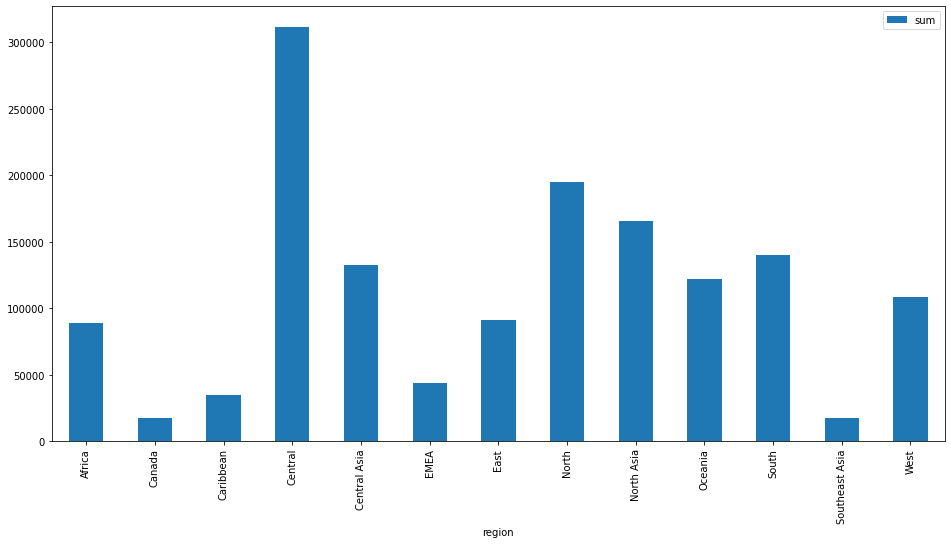

In [37]:
reg_profit_dist.plot.bar()


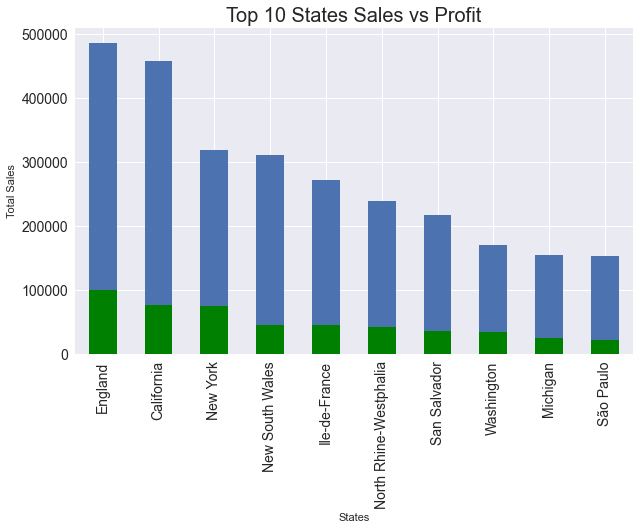

In [38]:
#Top 10 States Sales vs Profit

top_states_s = df.groupby('state')['sales'].sum().nlargest(n=10)
top_states_p = df.groupby('state')['profit'].sum().nlargest(n=10)


plt.figure(figsize=(10,6))
plt.style.use('seaborn')
top_states_s.plot(kind='bar',fontsize=14)
top_states_p.plot(kind='bar', fontsize=14, color='green')
plt.title('Top 10 States Sales vs Profit', fontsize=20)
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.show()

<AxesSubplot:xlabel='region', ylabel='profit'>

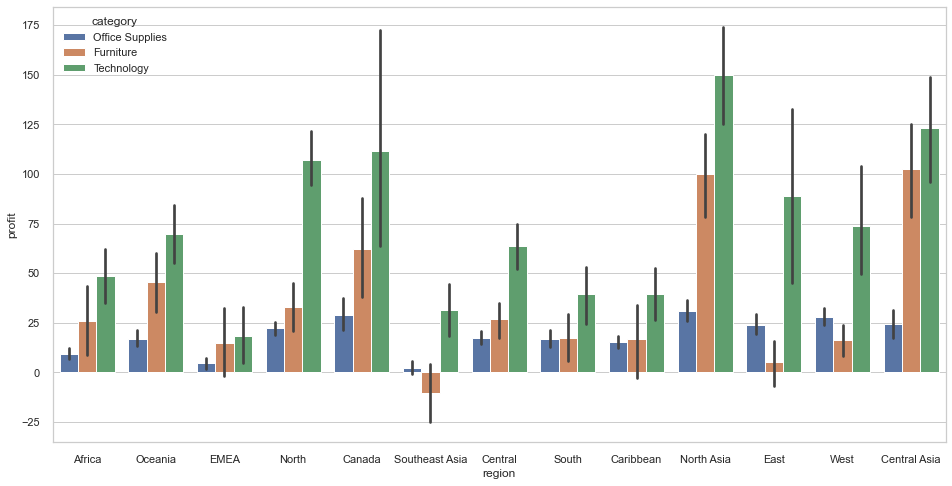

In [39]:
#profit by region and category

plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.barplot(x='region',y='profit', hue='category',data=df)

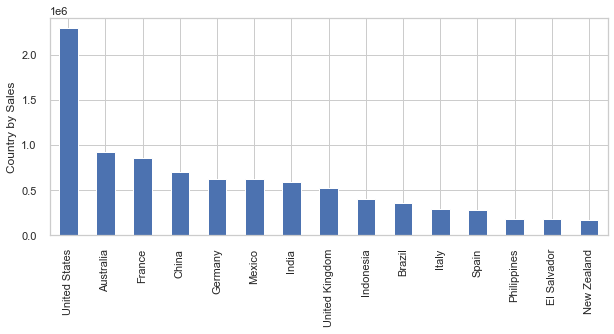

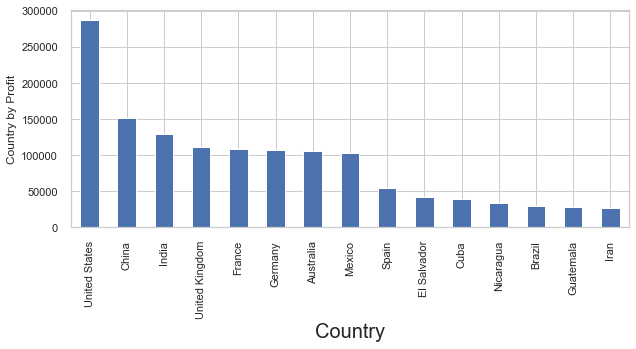

In [40]:
plt.figure(figsize=(10,4))
df.groupby(['country'])['sales'].sum().nlargest(n=15).plot.bar()
plt.xlabel('')
plt.ylabel('Country by Sales')

plt.figure(figsize=(10,4))
df.groupby(['country'])['profit'].sum().nlargest(n=15).plot.bar()
plt.xlabel('Country', fontsize=20)
plt.ylabel('Country by Profit')
plt.show()


In [41]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [42]:
from wordcloud import WordCloud

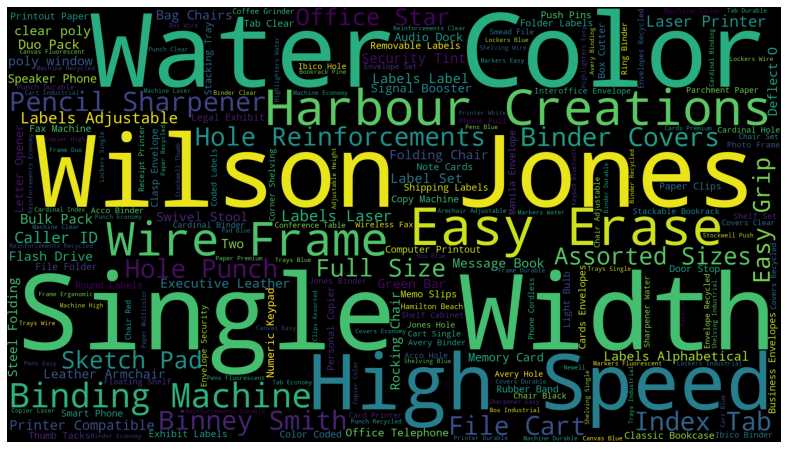

In [44]:
plt.subplots(figsize=(15,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df["category"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df['sub_category'].unique()

In [ ]:
Sub_cat_sales = pd.DataFrame(df.groupby(['sub_category'])['sales'].sum().nlargest(n=15))
print(Sub_cat_sales)

plt.figure(figsize=(14,5))
sns.lineplot(df['sub_category'],df['sales'], palette='winter')
plt.xticks(rotation='vertical')
plt.xlabel('Sales of sub-categories',fontsize=12)
plt.ylabel('Sales figure', fontsize=12)
plt.title('Sales Graph by Sub-Category', fontsize=16)
plt.show()

# Forecasting Sales Using Time Series

In [ ]:
sales_pred=df[['order_date','sales']]

In [ ]:
sales_pred

In [ ]:
sales_pred.set_index('order_date',inplace=True)

In [ ]:
sales_pred.index.set_names('Date',inplace=True)

In [ ]:
sales_pred

# Resampling Sales

In [ ]:
ts=sales_pred['sales'].resample('MS').sum()

In [ ]:
ts.head()

In [ ]:
ts.plot()

# Stationarity Check

In [ ]:
import statsmodels.api as sm

In [ ]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig= decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adftest=adfuller(ts)

In [ ]:
print('pvalue of adfuller test is:', adftest[1])

# Train Test Split

In [ ]:
len(ts)

In [ ]:
train=ts[:28]
test=ts[28:]

# Building ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(4,1,1)).fit()

# Predict Test dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [ ]:
pred.head()

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
error=np.sqrt(mean_squared_error(test,pred))
error

In [ ]:
test.mean(), np.sqrt(test.var())

In [ ]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='prediction_ARIMA')

# Predict Future Data using ARIMA: No seasonality

In [ ]:
final_model=ARIMA(ts,order=(4,1,1)).fit()

In [ ]:
prediction=final_model.predict(len(ts),len(ts)+9)

In [ ]:
ts.plot(legend=True, label='Train',figsize=(16,6))
prediction.plot(legend=True, label='prediction')

# SARIMAX Model: capturing seasonality

In [ ]:
sarimax_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(4,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_invertibility=False)

sarimax_results=sarimax_model.fit()

print(sarimax_results.summary().tables[1])

In [ ]:
sarimax_pred=sarimax_results.predict(len(ts),len(ts)+25)

In [ ]:
# Run model diagnostics to ensure that none of the assumptions made by the model have been violated

sarimax_results.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
ts.plot(legend=True, label='Train',figsize=(16,6))
sarimax_pred.plot(legend=True, label='prediction')

# How to Get ARIMA Hyperparameters p d q

In [ ]:
import itertools

In [ ]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [ ]:
pdq_combination=list(itertools.product(p,d,q))

In [ ]:
len(pdq_combination)

In [ ]:
rmse=[]
order1=[]

In [ ]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [ ]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

In [ ]:
results

In [ ]:
#results.to_csv('arima_results.csv')